In [2]:
#Setup and read in log file
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

sns.set(style="darkgrid")

df = pd.read_csv('choucas_experience.tsv', sep='\t')
df['time']= df['time'] / 1000 #convert ms to seconds

dfTut = df[df['logSection'] == 'Tutorial']
dfExp = df[df['logSection'] == 'Experiment']

#Choose whether we want to run analysis on the tutorial or the experiment
#df = dfTut
df = dfExp

df

,logSection,time,logText,value
875,Experiment,0.00,----- Starting Experiment -----,nan
876,Experiment,0.00,cancelManualZone(),nan
877,Experiment,0.01,Initialising System,nan
878,Experiment,0.01,Loading base map OSM,nan
879,Experiment,0.01,initialiseTable(),nan
880,Experiment,0.01,Add Scenario: 1,nan
881,Experiment,0.02,Add Scenario: 2,nan
882,Experiment,0.02,Add Scenario: 3,nan
883,Experiment,0.02,Adding a new filter: Filter1,nan
884,Experiment,0.03,selectFilter(Filter1),nan


In [3]:
#Stats Table
dfStats = pd.DataFrame(columns=['Statistic','Value'])

#Overpass Query Statistics
dfStats.loc[len(dfStats.index)+1] = ['Count runOverpassQuery', df.logText.str.count("runOverpassQuery").sum()]
meanOverpassQuery = df[df['logText'] == 'Overpass query response received in:'].value.mean() / 1000
dfStats.loc[len(dfStats.index)+1] = ['Avg Overpass Query Time (s)', meanOverpassQuery]

maxOverpassQuery = df[df['logText'] == 'Overpass query response received in:'].value.max() / 1000
dfStats.loc[len(dfStats.index)+1] = ['Max Overpass Query Time (s)', maxOverpassQuery]

#Filter Table Stats
dfStats.loc[len(dfStats.index)+1] = ['Count Adding a new filter', df.logText.str.count("Adding a new filter").sum()]
dfStats.loc[len(dfStats.index)+1] = ['Count bufferChanged', df.logText.str.count("bufferChanged").sum()]
dfStats.loc[len(dfStats.index)+1] = ['Count distanceChanged', df.logText.str.count("distanceChanged").sum()]
dfStats.loc[len(dfStats.index)+1] = ['Count checkboxChanged', df.logText.str.count("checkboxChanged").sum()]

dfStats

,Statistic,Value
1,Count runOverpassQuery,1
2,Avg Overpass Query Time (s),30.29
3,Max Overpass Query Time (s),30.29
4,Count Adding a new filter,8
5,Count bufferChanged,136
6,Count distanceChanged,0
7,Count checkboxChanged,6


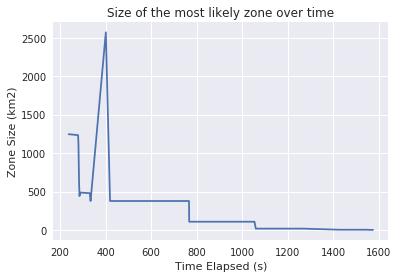

In [4]:
#Zone size over time graph
dfZoneSize = df[df['logText'].str.contains('Current Zone Size')]
#dfFilterCalc = dfFilterCalc[~dfFilterCalc['logText'].str.contains('Filter1')]
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Size of the most likely zone over time')
plt.xlabel('Time Elapsed (s)')
plt.ylabel('Zone Size (km2)')
plt.plot(dfZoneSize['time'], dfZoneSize['value']);

In [5]:
#Zone calculation statistics
dfFilterCalc = df[df['logText'].str.contains('Zone recalculated for Filter')]
counts = dfFilterCalc.groupby('logText')['value'].count()
means = dfFilterCalc.groupby('logText')['value'].mean()
maxs = dfFilterCalc.groupby('logText')['value'].max()
dfFilterCalcStats = pd.concat([counts, means, maxs], axis=1)
dfFilterCalcStats.columns = ['Filter Zone Calculations','Avg Calc Time', 'Max Calc Time']
dfFilterCalcStats

,Filter Zone Calculations,Avg Calc Time,Max Calc Time
logText,,,
Zone recalculated for Filter1 in:,94,70.73,6164.00
Zone recalculated for Filter4 in:,3,36992.67,108821.00
Zone recalculated for Filter5 in:,28,1588.79,4259.00
Zone recalculated for Filter6 in:,13,2401.08,8859.00
Zone recalculated for Filter7 in:,1,45382.00,45382.00
Zone recalculated for Filter8 in:,1,1031.00,1031.00


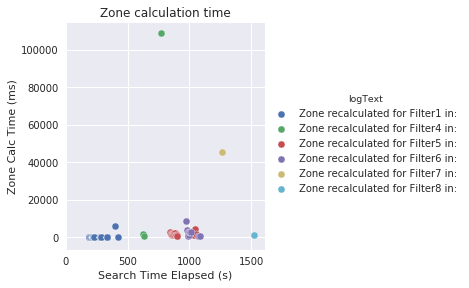

In [6]:
#Zone Calculation Graph
dfFilterZoneCalcs = df[df['logText'].str.contains('Zone recalculated for Filter')]
fig = sns.pairplot(x_vars=["time"], y_vars=["value"], data=dfFilterZoneCalcs, hue="logText", size=4)
plt.xlim(0, None)
plt.xlabel("Search Time Elapsed (s)")
plt.ylabel("Zone Calc Time (ms)")
plt.title("Zone calculation time")
plt.show(fig)

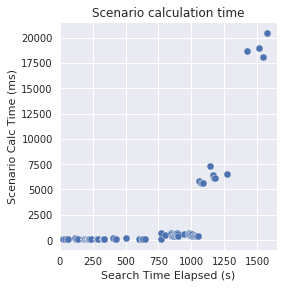

In [8]:
#Scenario Calculation Graph
dfScenarioCalcs = df[df['logText'].str.contains('Scenarios recalculated in:')]
fig = sns.pairplot(x_vars=["time"], y_vars=["value"], data=dfScenarioCalcs, size=4)
plt.xlim(0, None)
plt.xlabel("Search Time Elapsed (s)")
plt.ylabel("Scenario Calc Time (ms)")
plt.title("Scenario calculation time")
plt.show(fig)